<a href="https://colab.research.google.com/github/aishwarya602/Machine_Learning/blob/main/Mini_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA PREPROCESSING**

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [ ]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##**Handling of  missing or zero values**

In [ ]:
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in missing_cols:
    df[col] = df[col].replace(0, np.nan)  # Replace 0 with np.nan (null) in each specified column

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**REPLACING THE MISSING VALUES**

In [ ]:
# Replace missing values in the column with the mean of that column.
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
# Replace missing values in the column with the median of that column.
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## **Dealing With Outliers**

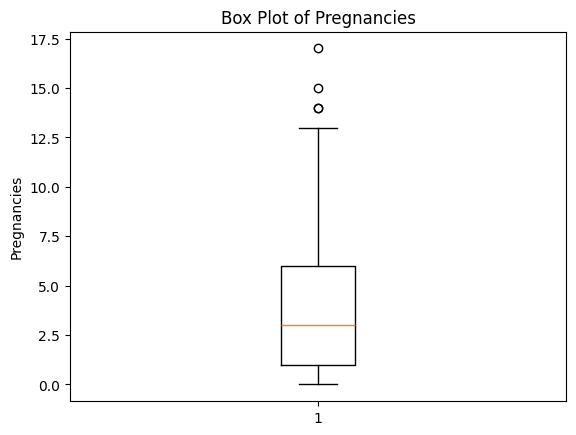

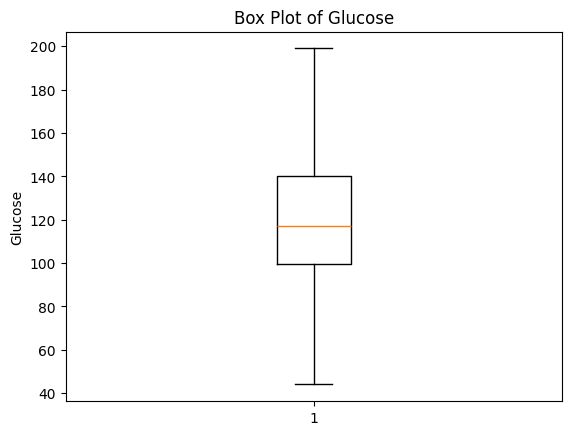

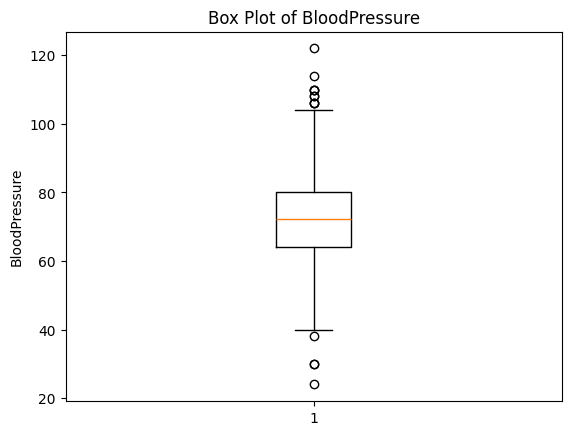

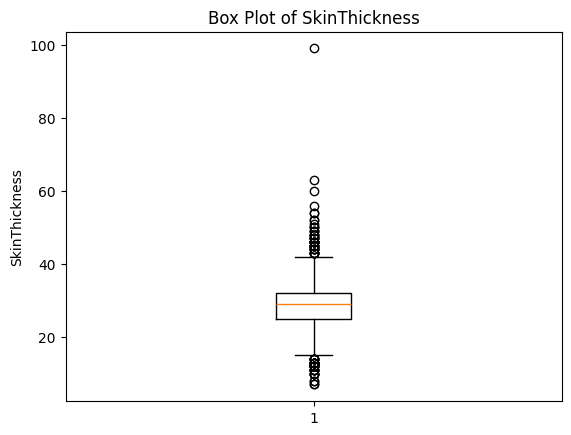

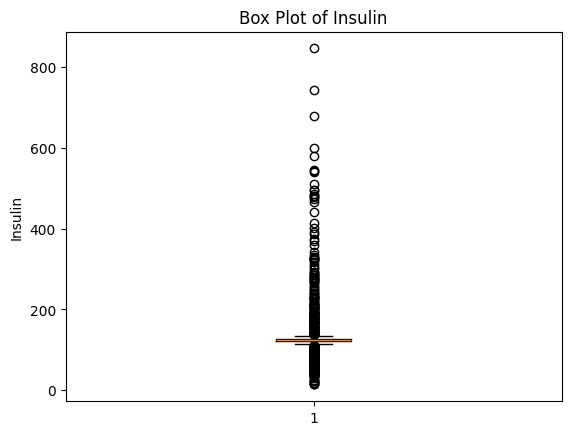

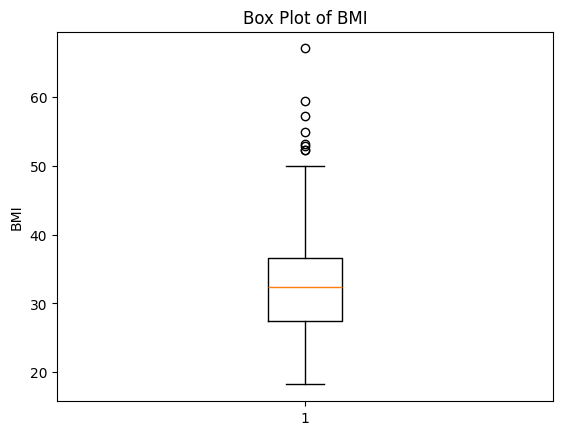

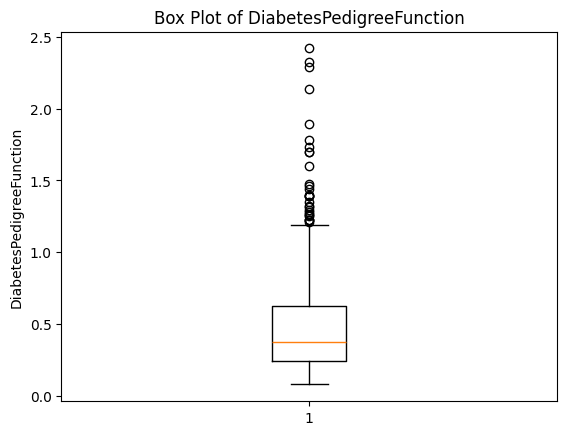

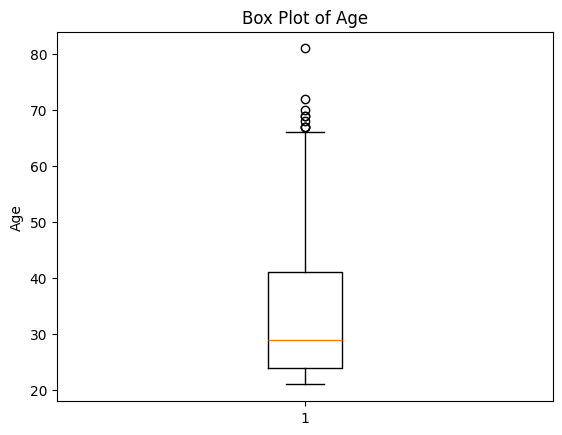

In [ ]:
numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in numerical_cols:
    plt.boxplot(df[col].dropna(), vert=True) #The .dropna() method ensures that any missing values in the column are excluded from the plot.
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.grid(False)
    plt.show()

In [ ]:
def remove_outliers_above_percentile(data_frame, column, percentile):
    threshold = data_frame[column].quantile(percentile / 100)
    filtered_df = data_frame[data_frame[column] <= threshold]
    print(f"Original shape for {column}: {data_frame.shape[0]} rows")
    print(f"Threshold for {column} (at {percentile}th percentile): {threshold:.2f}")
    print(f"Shape after removing outliers above {threshold:.2f}: {filtered_df.shape[0]} rows\n")
    return filtered_df

numerical_cols_for_new_removal = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

current_df = df.copy()

for col in numerical_cols_for_new_removal:
    current_df = remove_outliers_above_percentile(current_df, col, 99)

df = current_df
print(f"Final DataFrame shape after percentile-based outlier removal: {df.shape}")

Original shape for Pregnancies: 768 rows
Threshold for Pregnancies (at 99th percentile): 13.00
Shape after removing outliers above 13.00: 764 rows

Original shape for Glucose: 764 rows
Threshold for Glucose (at 99th percentile): 196.00
Shape after removing outliers above 196.00: 758 rows

Original shape for BloodPressure: 758 rows
Threshold for BloodPressure (at 99th percentile): 106.00
Shape after removing outliers above 106.00: 751 rows

Original shape for SkinThickness: 751 rows
Threshold for SkinThickness (at 99th percentile): 50.50
Shape after removing outliers above 50.50: 743 rows

Original shape for Insulin: 743 rows
Threshold for Insulin (at 99th percentile): 495.00
Shape after removing outliers above 495.00: 736 rows

Original shape for BMI: 736 rows
Threshold for BMI (at 99th percentile): 48.16
Shape after removing outliers above 48.16: 728 rows

Original shape for DiabetesPedigreeFunction: 728 rows
Threshold for DiabetesPedigreeFunction (at 99th percentile): 1.57
Shape afte

**NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features to scale (all columns except 'Outcome')
features_to_scale = df.columns.drop('Outcome')

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("DataFrame after standardization:")
print(df.head())


DataFrame after standardization:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.667683  0.950724       0.007337       0.820272 -0.143055  0.277215   
1    -0.867171 -1.188344      -0.519752       0.065051 -0.143055 -0.853007   
2     1.281625  2.139095      -0.695449       0.065051 -0.143055 -1.385826   
3    -0.867171 -1.052531      -0.519752      -0.690171 -0.598979 -0.610817   
5     0.360712 -0.135787       0.183033       0.065051 -0.143055 -1.014468   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.627574  1.520036        1  
1                 -0.347213 -0.164120        0  
2                  0.786506 -0.075480        1  
3                 -0.997071 -1.050518        0  
5                 -0.876989 -0.252760        0  


##**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the normalized DataFrame
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Shapes of the resulting datasets:')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


Shapes of the resulting datasets:
X_train shape: (571, 8)
X_test shape: (143, 8)
y_train shape: (571,)
y_test shape: (143,)


#**Model Implementation**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # max_iter is set to avoid convergence warnings
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]


In [ ]:
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

#**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

##Logistic Regression



In [ ]:
#Logistic Regression
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
cv_logreg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy').mean()
print("\nCross-Validation Accuracy:", cv_logreg)

Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84        96
           1       0.71      0.53      0.61        47

    accuracy                           0.78       143
   macro avg       0.76      0.71      0.73       143
weighted avg       0.77      0.78      0.77       143

Confusion Matrix:
 [[86 10]
 [22 25]]

Cross-Validation Accuracy: 0.766098690042352


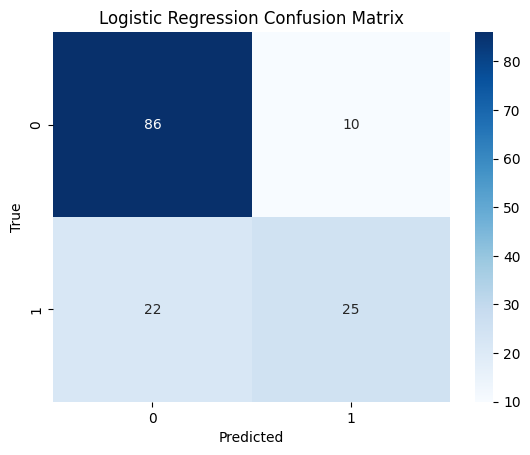

In [ ]:
# Confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##KNN

In [ ]:
#K-Nearest Neighbor
print("\nk-NN:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
cv_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
print("\nCross-Validation Accuracy:", cv_knn)


k-NN:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        96
           1       0.67      0.60      0.63        47

    accuracy                           0.77       143
   macro avg       0.74      0.72      0.73       143
weighted avg       0.76      0.77      0.77       143

Confusion Matrix:
 [[82 14]
 [19 28]]

Cross-Validation Accuracy: 0.7325125578646705


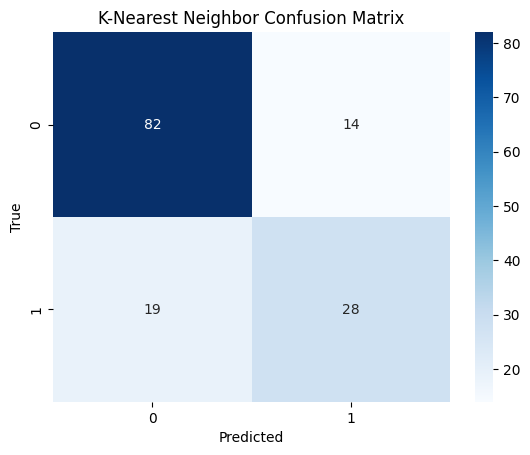

In [ ]:
# Confusion matrix for K-Nearest Neighbor
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbor Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##Naive Bayes

In [ ]:
#Naive Bayes
print("\nNaive Bayes:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
cv_nb = cross_val_score(nb, X, y, cv=5, scoring='accuracy').mean()
print("\nCross-Validation Accuracy:", cv_nb)


Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        96
           1       0.63      0.57      0.60        47

    accuracy                           0.75       143
   macro avg       0.71      0.70      0.71       143
weighted avg       0.74      0.75      0.75       143

Confusion Matrix:
 [[80 16]
 [20 27]]

Cross-Validation Accuracy: 0.7577267802619915


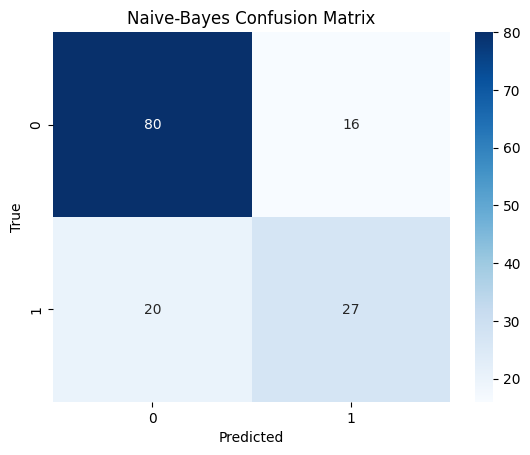

In [ ]:
# Confusion matrix for Naive-Bayes
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive-Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##XGBoost

In [ ]:
#XGBoost
print("\nXGBoost:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
cv_xgb = cross_val_score(xgb, X, y, cv=5, scoring='accuracy').mean()
print("Cross-Validation Accuracy:", cv_xgb)


XGBoost:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        96
           1       0.74      0.55      0.63        47

    accuracy                           0.79       143
   macro avg       0.77      0.73      0.74       143
weighted avg       0.78      0.79      0.78       143

Confusion Matrix:
 [[87  9]
 [21 26]]
Cross-Validation Accuracy: 0.736668964837979


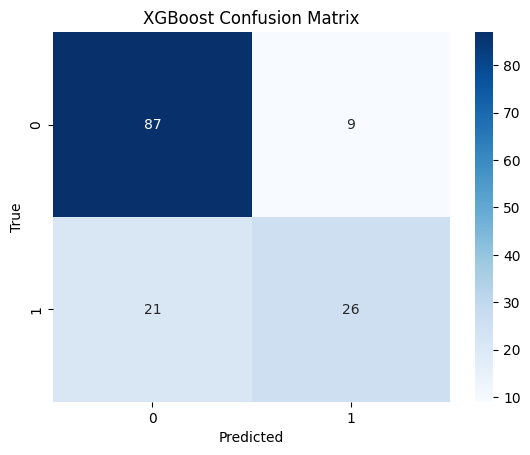

In [ ]:
# Confusion matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##ROC curves and  AUC for each model.

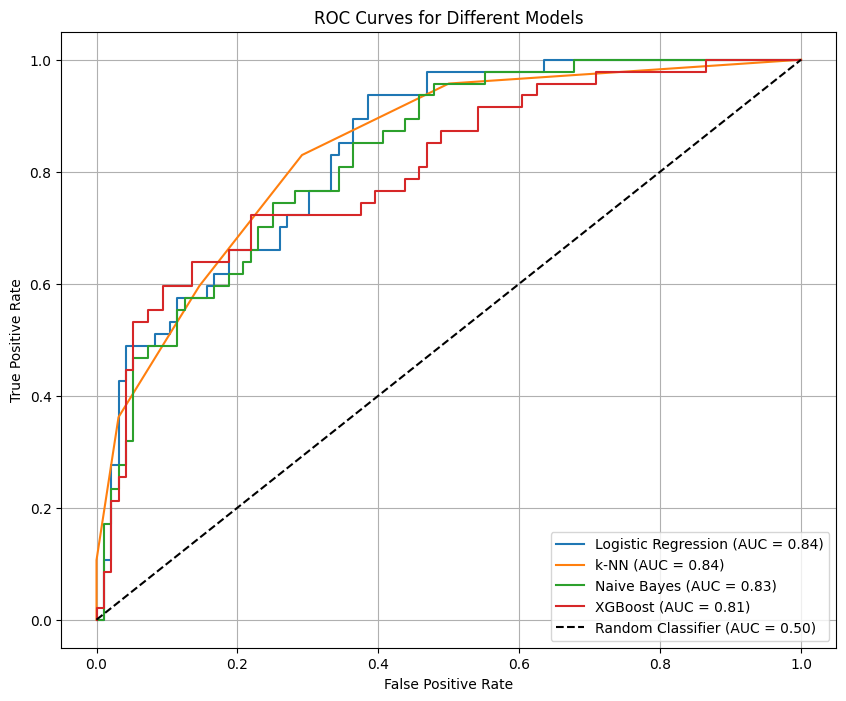

AUC for Logistic Regression: 0.84
AUC for k-NN: 0.84
AUC for Naive Bayes: 0.83
AUC for XGBoost: 0.81


In [ ]:
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')

# K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {auc_knn:.2f})')

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plotting the diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC for Logistic Regression: {auc_log_reg:.2f}")
print(f"AUC for k-NN: {auc_knn:.2f}")
print(f"AUC for Naive Bayes: {auc_nb:.2f}")
print(f"AUC for XGBoost: {auc_xgb:.2f}")

#**Model Performance Comparison**

Here's a summary of the key evaluation metrics for each model on the test set:

*   **Logistic Regression:**
    *   Accuracy: 0.78
    *   Cross-Validation Accuracy: 0.77
    *   AUC: 0.84
    *   Precision (Class 1): 0.71
    *   Recall (Class 1): 0.53
    *   F1-score (Class 1): 0.61

*   **K-Nearest Neighbors (k-NN):**
    *   Accuracy: 0.77
    *   Cross-Validation Accuracy: 0.73
    *   AUC: 0.84
    *   Precision (Class 1): 0.67
    *   Recall (Class 1): 0.60
    *   F1-score (Class 1): 0.63

*   **Naive Bayes:**
    *   Accuracy: 0.75
    *   Cross-Validation Accuracy: 0.76
    *   AUC: 0.83
    *   Precision (Class 1): 0.63
    *   Recall (Class 1): 0.57
    *   F1-score (Class 1): 0.60

*   **XGBoost:**
    *   Accuracy: 0.79
    *   Cross-Validation Accuracy: 0.74
    *   AUC: 0.81
    *   Precision (Class 1): 0.74
    *   Recall (Class 1): 0.55
    *   F1-score (Class 1): 0.63

### Which Model Performed Best and Why?

It's a nuanced decision as "best" can depend on the specific goals of the classification task (e.g., maximizing recall vs. precision). However, considering a balance of metrics:

*   **Logistic Regression** and **k-NN** both demonstrated strong overall discriminative power with the highest AUC scores (0.84). Logistic Regression also had the highest cross-validation accuracy (0.77), indicating good generalization performance. k-NN, while having similar AUC, showed a slightly better recall for the positive class (0.60), meaning it was better at identifying actual diabetic cases.

*   **XGBoost** achieved the highest accuracy on the test set (0.79) and the highest precision for the positive class (0.74), suggesting it made fewer false positive predictions. However, its AUC and cross-validation accuracy were slightly lower than Logistic Regression and k-NN.

*   **Naive Bayes** generally performed slightly less well across most metrics compared to the other three models.

**Overall, Logistic Regression emerges as a very strong candidate due to its high AUC, robust cross-validation accuracy, and generally balanced performance. If minimizing false positives is critical, XGBoost could be preferred due to its higher precision. If minimizing false negatives is paramount, k-NN is worth considering for its higher recall.**

### Impact of Preprocessing and Hyperparameter Tuning

**Impact of Preprocessing:**
The preprocessing steps were absolutely crucial for the success of these models:

1.  **Handling Missing/Zero Values:** Replacing biologically implausible zero values in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` with `NaN` and then imputing them (mean for `Glucose`, `BloodPressure`, `BMI`; median for `SkinThickness`, `Insulin`) ensured that the models learned from meaningful data rather than misleading zeros. This is a fundamental step for data quality.

2.  **Outlier Removal:** Using a percentile-based method to remove outliers helped in creating a more robust dataset. Extreme values can disproportionately influence model training, especially for algorithms like k-NN and Logistic Regression. By reducing their impact, the models were able to learn more generalized patterns.

3.  **Normalization (StandardScaler):** Scaling the numerical features to have zero mean and unit variance is vital for many machine learning algorithms. For distance-based methods like k-NN, it prevents features with larger scales from dominating the distance calculations. For gradient-descent-based methods like Logistic Regression and XGBoost, it helps in faster and more stable convergence during training. Without normalization, the models would likely struggle to learn effectively and yield suboptimal performance.

**Impact of Hyperparameter Tuning:**
In this analysis, the models were largely run with their default hyperparameters or with minimal adjustments (e.g., `max_iter` for Logistic Regression, `eval_metric` for XGBoost). No extensive hyperparameter tuning (such as using techniques like GridSearchCV or RandomizedSearchCV) was explicitly performed.

*   **Current State:** The current results reflect the out-of-the-box performance of these algorithms after robust preprocessing.
*   **Potential for Improvement:** Dedicated hyperparameter tuning would very likely lead to further performance gains for all models. For instance:
    *   For **k-NN**, optimizing the number of neighbors (`n_neighbors`) can significantly impact its performance.
    *   For **XGBoost**, tuning parameters like `n_estimators`, `learning_rate`, `max_depth`, and `subsample` can yield substantial improvements.
    *   Even **Logistic Regression** has regularization strength (`C`) that could be optimized.

Therefore, while preprocessing set a strong foundation for the models to learn effectively, further optimization through hyperparameter tuning could potentially elevate their performance even higher.